In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import spsolve
from scipy.spatial import Delaunay
import matplotlib.tri as tri

In [58]:
from dataclasses import dataclass
from typing import Annotated
from numpy import floating
from numpy.typing import NDArray

@dataclass
class TriangulatedGrid:
    resolution: int
    points: NDArray
    X: NDArray
    Y: NDArray
    triangulation: tri.Triangulation

    def __init__(
            self,
            resolution: int,
            xlim: tuple[Annotated[float, "min"], Annotated[float, "max"]] = (-1,1),
            ylim: tuple[Annotated[float, "min"], Annotated[float, "max"]] = (-1,1),
        ):
        xmin, xmax = xlim
        ymin, ymax = ylim

        x: NDArray[floating]
        y: NDArray[floating]
        x, y = np.meshgrid(
            np.linspace(xmin, xmax, resolution),
            np.linspace(ymin, ymax, resolution)
        )

        triangles = []
        for j in range(resolution - 1):
            for i in range(resolution - 1):
                # Calculate the indices of the four corners of the square
                p1 = j * resolution + i      # Bottom-left corner
                p2 = p1 + 1                  # Bottom-right corner
                p3 = p1 + resolution         # Top-left corner
                p4 = p3 + 1                  # Top-right corner

                # Define two triangles using the same diagonal from bottom-left to top-right
                triangles.append([p1, p2, p4])  # Bottom-left triangle
                triangles.append([p1, p4, p3])  # Top-right triangle

        self.resolution = resolution
        self.X = x.flatten()
        self.Y = y.flatten()
        self.points = np.vstack([self.X, self.Y]).T
        self.triangulation = tri.Triangulation(self.X, self.Y, triangles)

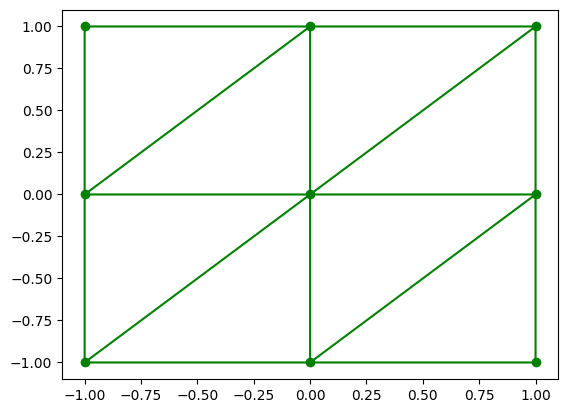

In [59]:
trigrid = TriangulatedGrid(3)
plt.triplot(trigrid.triangulation, 'go-', lw=1.5)

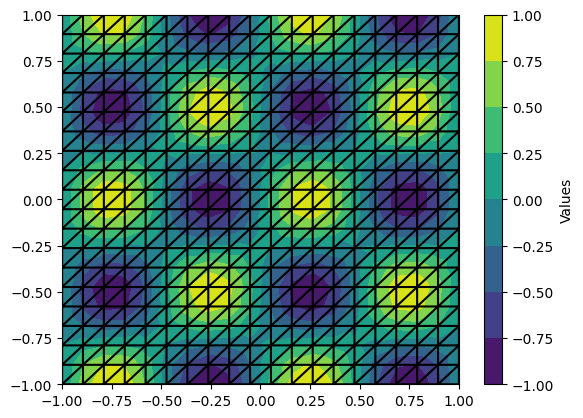

In [60]:
def dummy_triplot(trigrid: TriangulatedGrid):
    # Colorize each node according to some dummy function
    values = np.sin(2*np.pi*trigrid.X) * np.cos(2*np.pi*trigrid.Y)

    plt.tricontourf(trigrid.triangulation, values, cmap="viridis")
    plt.triplot(trigrid.triangulation, "k-")
    plt.colorbar(label='Values')
    plt.show()

dummy_triplot(TriangulatedGrid(20))



> RE: Kovertering mellan matrismultiplikation och summor
>
> $A \in \mathbb{R}^{m \times n}$, $B \in \mathbb{R}^{n \times w}$
>
> $(A \cdot B)_i = \displaystyle\sum_{k\in\mathbb{K}} A_{ik} \cdot B_{k}$

> RE: Styvhetsmatris defintion i 2d
>
> $\displaystyle\sum_{i=1}^N U_i
\underbrace{\iint_D a \nabla\phi_i \cdot \nabla\phi_j dA}_{\large a_{ji}}
= \underbrace{\iint_D f\phi_jdA}_{\large b_{j}}
,\quad j=1,\cdots,N$
>
> Blir igen:
> $AU = b$

In [65]:

@dataclass
class StiffnessMatrixSolve:
    A: NDArray
    b: NDArray

    def __init__(self, trigrid: TriangulatedGrid):
        n_vertices = trigrid.resolution*trigrid.resolution
        A = np.zeros((n_vertices, n_vertices))
        b = np.zeros((n_vertices, 1))

        for corner_indexes in trigrid.triangulation.triangles:
            vertices = trigrid.points[corner_indexes]

            area = 0.5 * np.abs(
                np.linalg.det(
                    np.array([
                        [vertices[1][0] - vertices[0][0], vertices[2][0] - vertices[0][0]],
                        [vertices[1][1] - vertices[0][1], vertices[2][1] - vertices[0][1]]
                    ])
                )
            )

            print(f"{corner_indexes=} {vertices=} {area=}")

        self.A = A
        self.b = b

StiffnessMatrixSolve(TriangulatedGrid(3))


corner_indexes=array([0, 1, 4]) vertices=array([[-1., -1.],
       [ 0., -1.],
       [ 0.,  0.]]) area=0.5
corner_indexes=array([0, 4, 3]) vertices=array([[-1., -1.],
       [ 0.,  0.],
       [-1.,  0.]]) area=0.5
corner_indexes=array([1, 2, 5]) vertices=array([[ 0., -1.],
       [ 1., -1.],
       [ 1.,  0.]]) area=0.5
corner_indexes=array([1, 5, 4]) vertices=array([[ 0., -1.],
       [ 1.,  0.],
       [ 0.,  0.]]) area=0.5
corner_indexes=array([3, 4, 7]) vertices=array([[-1.,  0.],
       [ 0.,  0.],
       [ 0.,  1.]]) area=0.5
corner_indexes=array([3, 7, 6]) vertices=array([[-1.,  0.],
       [ 0.,  1.],
       [-1.,  1.]]) area=0.5
corner_indexes=array([4, 5, 8]) vertices=array([[0., 0.],
       [1., 0.],
       [1., 1.]]) area=0.5
corner_indexes=array([4, 8, 7]) vertices=array([[0., 0.],
       [1., 1.],
       [0., 1.]]) area=0.5


StiffnessMatrixSolve(A=array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]]), b=array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]]))